In [3]:
from langchain_ollama import ChatOllama
from typing import Annotated, List, TypedDict, Literal
from langchain_core.messages import AnyMessage, HumanMessage, SystemMessage, RemoveMessage
from langgraph.graph import add_messages

llm = ChatOllama(model="llama3.2")

class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]
    summary: str
    
    
def generate_strings(state):
    response = llm.invoke(state["messages"])
    
    return {
        "messages": [response],
    }
    
def summary_node(state):
    sys_msg = """You are an agent that summarizes the following conversation. The summary should provide a concise overview of the conversation's main points."""
    
    response = llm.invoke([SystemMessage(content=sys_msg)] + state["messages"])
    delete_messages =  [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    
    print(f"******** Summary: {response.content} ****")
    return {
        "summary": response.content,
        "messages": [response] + delete_messages 
    }
    
def check_message_length(state) -> Literal['summary_node', '__end__']:
    if len(state["messages"]) > 4:
        return 'summary_node'
    
    return '__end__'

ModuleNotFoundError: No module named 'langgraph'

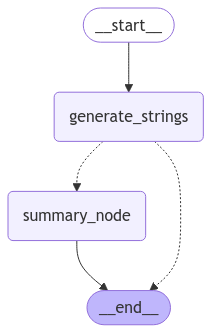

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

builder = StateGraph(State)
builder.add_node(generate_strings)
builder.add_node(summary_node)

builder.add_edge(START, 'generate_strings')
builder.add_conditional_edges('generate_strings', check_message_length)
builder.add_edge('summary_node', END)

graph = builder.compile(checkpointer=MemorySaver())


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
config = {"configurable": {"thread_id": "1"}}
input_msg = "Hi, I'm looking for a job in data science."
state = {"messages": [HumanMessage(content=input_msg)], "summary": ""}
result = graph.invoke(state, config=config)
result["messages"][-1].pretty_print()

while True:
    input_msg = input("Enter a message: ")
    if input_msg.lower() == "q":
        break
    state = {"messages": [HumanMessage(content=input_msg)]}
    result = graph.invoke(state, config)
    result["messages"][-1].pretty_print()




================================== Ai Message ==================================

Data science is an exciting and rapidly growing field with numerous job opportunities.

To get started, can you tell me a bit more about your background and what you're looking for in a role? For example:

* Do you have any prior experience in data science or related fields like statistics, computer science, or engineering?
* What specific areas of data science are you interested in (e.g. machine learning, data visualization, predictive modeling)?
* Are you looking for an entry-level position or something more senior?
* Do you have a preferred industry or company in mind?

Also, I can offer some general advice:

1. **Update your skills**: Make sure you have the necessary skills for a data scientist role, such as proficiency in programming languages like Python, R, or SQL, and experience with machine learning libraries like scikit-learn, TensorFlow, or PyTorch.
2. **Build a portfolio**: Create a portfolio 